In [62]:
from gridWorld import gridWorld
import random
import numpy as np
import matplotlib.pyplot as plt

STATIONARY = False

class SARSASolver:
    def __init__(self, env):
        self.q_table = {}
        self.alpha = 0.1
        self.gamma = 0.9
        self.epsilon = 0.1
        self.env = env
        self.action_options = ["up", "down", "left", "right", "stay"]


    def choose_action(self, state):
        # if the random is more than epsilon
        if random.random() < self.epsilon:
            # pick random action
            return random.choice(self.action_options)
        else:
        # else pick the best based on Q
            # create state_action pairs
            state_actions = [(tuple(state), action) for action in self.action_options]
            # determine the best q_value for all the pairs
            q_values = [self.q_table.get(pair, 0) for pair in state_actions]
            best_q = max(q_values)
            # pull the actions with the best q_value
            actions = []
            for i in range(len(state_actions)):
                if best_q == q_values[i]:
                    actions.append(self.action_options[i])
            # pick a random from that list if multiple best_q
            return random.choice(actions)
        
    def learn(self, num_episodes):
        total_rewards = []
        for learning_epoch in range(num_episodes):
            state = env.reset()     
            total_reward = 0                 #every episode, reset the environment to the original configuration
            for time_step in range(20):
                action = self.choose_action(state)

                if (STATIONARY):
                    next_state,reward=env.step(action)  #the action is taken, a reward and new state is returned
                else:
                    next_state,reward=env.step(action,rng_door=True)  #the action is taken, a reward and new state is returned
                next_action = self.choose_action(state) #learner chooses one of these actions

                # learning
                # pull current and next q_values
                current_q = self.q_table.get((tuple(state), action), 0)
                next_q = self.q_table.get((tuple(next_state), next_action), 0)
                # update q_table
                self.q_table[(tuple(state), action)] = current_q + self.alpha * (reward + self.gamma * next_q - current_q)
                # move to next state
                state = next_state
                action = next_action

                # update total reward
                total_reward = total_reward + reward
            total_rewards.append(total_reward)
        return total_rewards
    
    

                    
class QLearnerSolver:
    def __init__(self,env):
        self.q_table = {}
        self.alpha = 0.1
        self.gamma = 0.95
        self.epsilon = 0.1
        self.env = env
        self.action_options = ["up", "down", "left", "right", "stay"]


    def choose_action(self, state):
        # if the random is more than epsilon
        if random.random() < self.epsilon:
            # pick random action
            return random.choice(self.action_options)
        else:
        # else pick the best based on Q
            # create state_action pairs
            state_actions = [(tuple(state), action) for action in self.action_options]
            # determine the best q_value for all the pairs
            q_values = [self.q_table.get(pair, 0) for pair in state_actions]
            best_q = max(q_values)
            # pull the actions with the best q_value
            actions = []
            for i in range(len(state_actions)):
                if best_q == q_values[i]:
                    actions.append(self.action_options[i])
            # pick a random from that list if multiple best_q
            return random.choice(actions)
        
    def learn(self, num_episodes):
        total_rewards = []
        for learning_epoch in range(num_episodes):
            state = env.reset()     
            total_reward = 0                 #every episode, reset the environment to the original configuration
            for time_step in range(20):
                action = self.choose_action(state) #learner chooses one of these actions
                if (STATIONARY):
                    next_state,reward=env.step(action)  #the action is taken, a reward and new state is returned
                else:
                    next_state,reward=env.step(action,rng_door=True)  #the action is taken, a reward and new state is returned
                next_action = self.choose_action(state) #learner chooses one of these actions

                # learning
                # pull current and next q_values
                current_q = self.q_table.get((tuple(state), action), 0)
                max_q_next = max(self.q_table.get((tuple(next_state), a), 0) for a in self.action_options)
                # update q_table
                self.q_table[(tuple(state), action)] = current_q + self.alpha * (reward + self.gamma * max_q_next - current_q)
                # move to next state
                state = next_state
                action = next_action

                # update total reward
                total_reward = total_reward + reward
            total_rewards.append(total_reward)
        return total_rewards
    

if __name__=="__main__":
    num_episodes = 500
    num_trials = 10
    #example usage for a gym-like environment 
    #state: [x,y] coordinate of the agent
    #actions: ["up","down","left","right"] directions the agent can move
    env=gridWorld()
    sarsa_all_rewards =[]
    q_all_rewards = []
    for trial in range(num_trials):
        learner1=SARSASolver(env)
        learner2=QLearnerSolver(env)
        sarsa_total_rewards = learner1.learn(num_episodes)
        q_total_rewards = learner2.learn(num_episodes)

        sarsa_all_rewards.append(sarsa_total_rewards)
        q_all_rewards.append(q_total_rewards)

    # caluclate averaged rewards
    sarsa_avg_rewards = []
    for reward_ep in zip(*sarsa_all_rewards):
        sarsa_avg_rewards.append(sum(reward_ep)/num_trials)

    q_avg_rewards = []
    for reward_ep in zip(*q_all_rewards):
        q_avg_rewards.append(sum(reward_ep)/num_trials)

    # calculate q-values for heat maps
    sarsa_q_values = np.zeros((10, 5, 5)) 
    qlearning_q_values = np.zeros((10, 5, 5))

    for x in range(10):
        for y in range(5):
            for index, action in enumerate(["up", "down", "left", "right","stay"]):
                sarsa_q_values[x, y, index] = learner1.q_table.get(((x, y), action), 0)
                qlearning_q_values[x, y, index] = learner2.q_table.get(((x, y), action), 0)



    

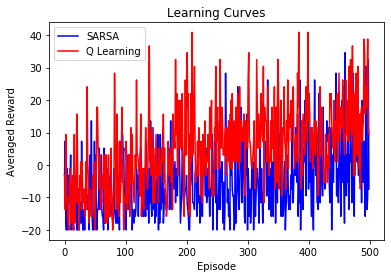

In [63]:
plt.plot(range(num_episodes), sarsa_avg_rewards, c='b', label="SARSA")
plt.plot(range(num_episodes), q_avg_rewards, c='r', label="Q Learning")
plt.legend()
plt.xlabel("Episode")
plt.ylabel("Averaged Reward")
plt.title("Learning Curves")
plt.show()



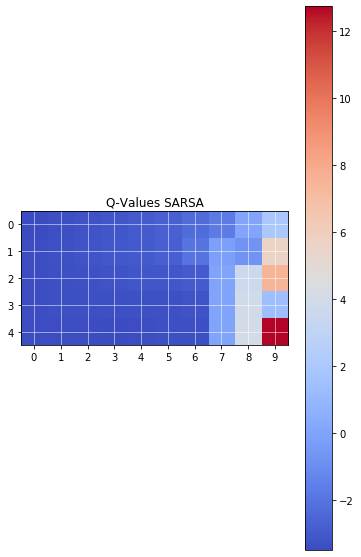

In [64]:

plt.figure(figsize=(6, 10))
plt.imshow(np.flip(np.transpose(sarsa_q_values.max(axis=2)),0), cmap='coolwarm')
plt.colorbar()
plt.title("Q-Values SARSA")
plt.xticks(range(10))
plt.yticks(range(5))
plt.grid(color='w', linestyle='-', linewidth=0.5)
plt.show()
            

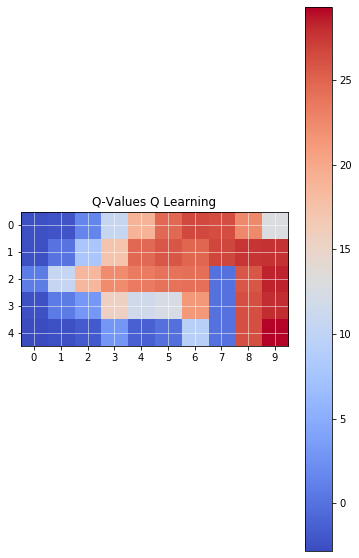

In [65]:
plt.figure(figsize=(6, 10))
plt.imshow(np.flip(np.transpose(qlearning_q_values.max(axis=2)),0), cmap='coolwarm')
plt.colorbar()
plt.title("Q-Values Q Learning")
plt.xticks(range(10))
plt.yticks(range(5))
plt.grid(color='w', linestyle='-', linewidth=0.5)
plt.show()